In [ ]:
 import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Levine_32dim.fcs.csv")

# remove the event, time and individual columns
df = df.drop(columns=['Event', 'Time', 'individual',
             'file_number', 'event_number'])



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df   

,Cell_length,DNA1,DNA2,CD45RA,CD133,CD19,CD22,CD11b,CD4,CD8,...,CD13,CD3,CD61,CD117,CD49d,HLA-DR,CD64,CD41,Viability,label
0,22,4.391057,4.617262,0.162691,-0.029585,-0.006696,0.066388,-0.009184,0.363602,0.520195,...,0.038552,-0.032596,-0.002936,0.053050,0.853505,1.664480,-0.005376,-0.001961,0.648429,1.0
1,35,4.340481,4.816692,0.701349,-0.038280,-0.016654,0.074409,0.808031,-0.035424,-0.010551,...,1.457326,-0.043466,1.258437,0.089660,0.197818,0.491592,0.144814,0.868014,0.561384,1.0
2,32,3.838727,4.386369,0.603568,-0.032216,0.073855,-0.042977,-0.001881,-0.008781,-0.005632,...,0.213583,0.320792,0.257137,0.046222,2.586670,1.308337,-0.010961,-0.010413,0.643337,1.0
3,29,4.255806,4.830048,0.433747,-0.027611,-0.017661,-0.044072,0.733698,-0.019066,0.056109,...,0.514349,0.060443,-0.041140,0.066470,1.338669,0.140523,-0.013449,-0.026039,-0.026523,1.0
4,25,3.976909,4.506433,-0.008809,-0.030297,0.080423,0.495791,1.107627,0.552746,0.031310,...,0.585712,0.137186,0.168609,-0.006223,0.180924,0.197332,0.076167,-0.040488,0.283287,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265622,41,6.826629,7.133022,1.474081,-0.019174,-0.055620,-0.007261,0.063395,0.145304,0.358648,...,0.490487,4.984959,0.861068,-0.011105,0.533736,0.123758,-0.042495,-0.027971,0.236957,NaN
265623,45,6.787791,7.154026,0.116755,-0.056213,-0.008864,-0.035158,-0.041845,0.970120,-0.023903,...,0.408006,5.112841,0.565170,0.143869,1.269464,0.047215,-0.008000,-0.025811,-0.003500,NaN
265624,41,6.889866,7.141219,0.684921,-0.006264,-0.026111,-0.030837,-0.034641,1.597189,0.257884,...,0.104754,5.098065,-0.008680,0.087102,-0.055912,0.501536,0.053884,-0.042602,0.107206,NaN
265625,39,6.865218,7.144353,0.288761,-0.011310,-0.048786,0.073983,-0.031787,0.078800,-0.000954,...,0.275652,-0.014854,-0.029347,-0.047971,0.101955,6.200001,0.296877,0.192786,0.620872,NaN


In [ ]:

# Run describe() method on your dataframe
df_describe = df.describe()

# Export the output to a CSV file
df_describe.to_csv('describe_output.csv', index=False)

In [ ]:
df_nonnull = df[df.notnull().all(axis=1)]


In [ ]:
num_nan = df['label'].isnull().sum()
num_nan

161443

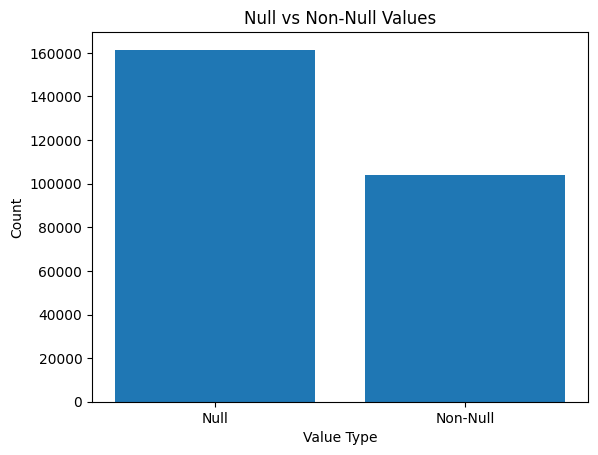

In [ ]:
null_mask = df.isnull()
nonnull_mask = ~null_mask

# count the number of null and non-null values
num_null = null_mask.sum()
num_nonnull = nonnull_mask.sum()

# create a histogram of the counts
plt.bar(['Null', 'Non-Null'], [num_null.sum(), df_nonnull.shape[0]])
plt.xlabel('Value Type')
plt.ylabel('Count')
plt.title('Null vs Non-Null Values')
plt.show()


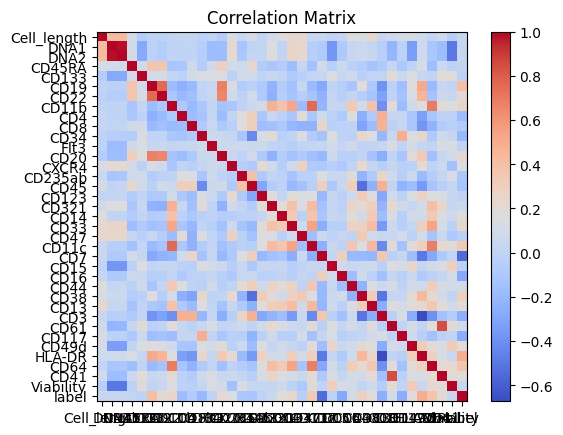

In [ ]:
corr_matrix = df.corr()

# create a heatmap of the matrix
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()







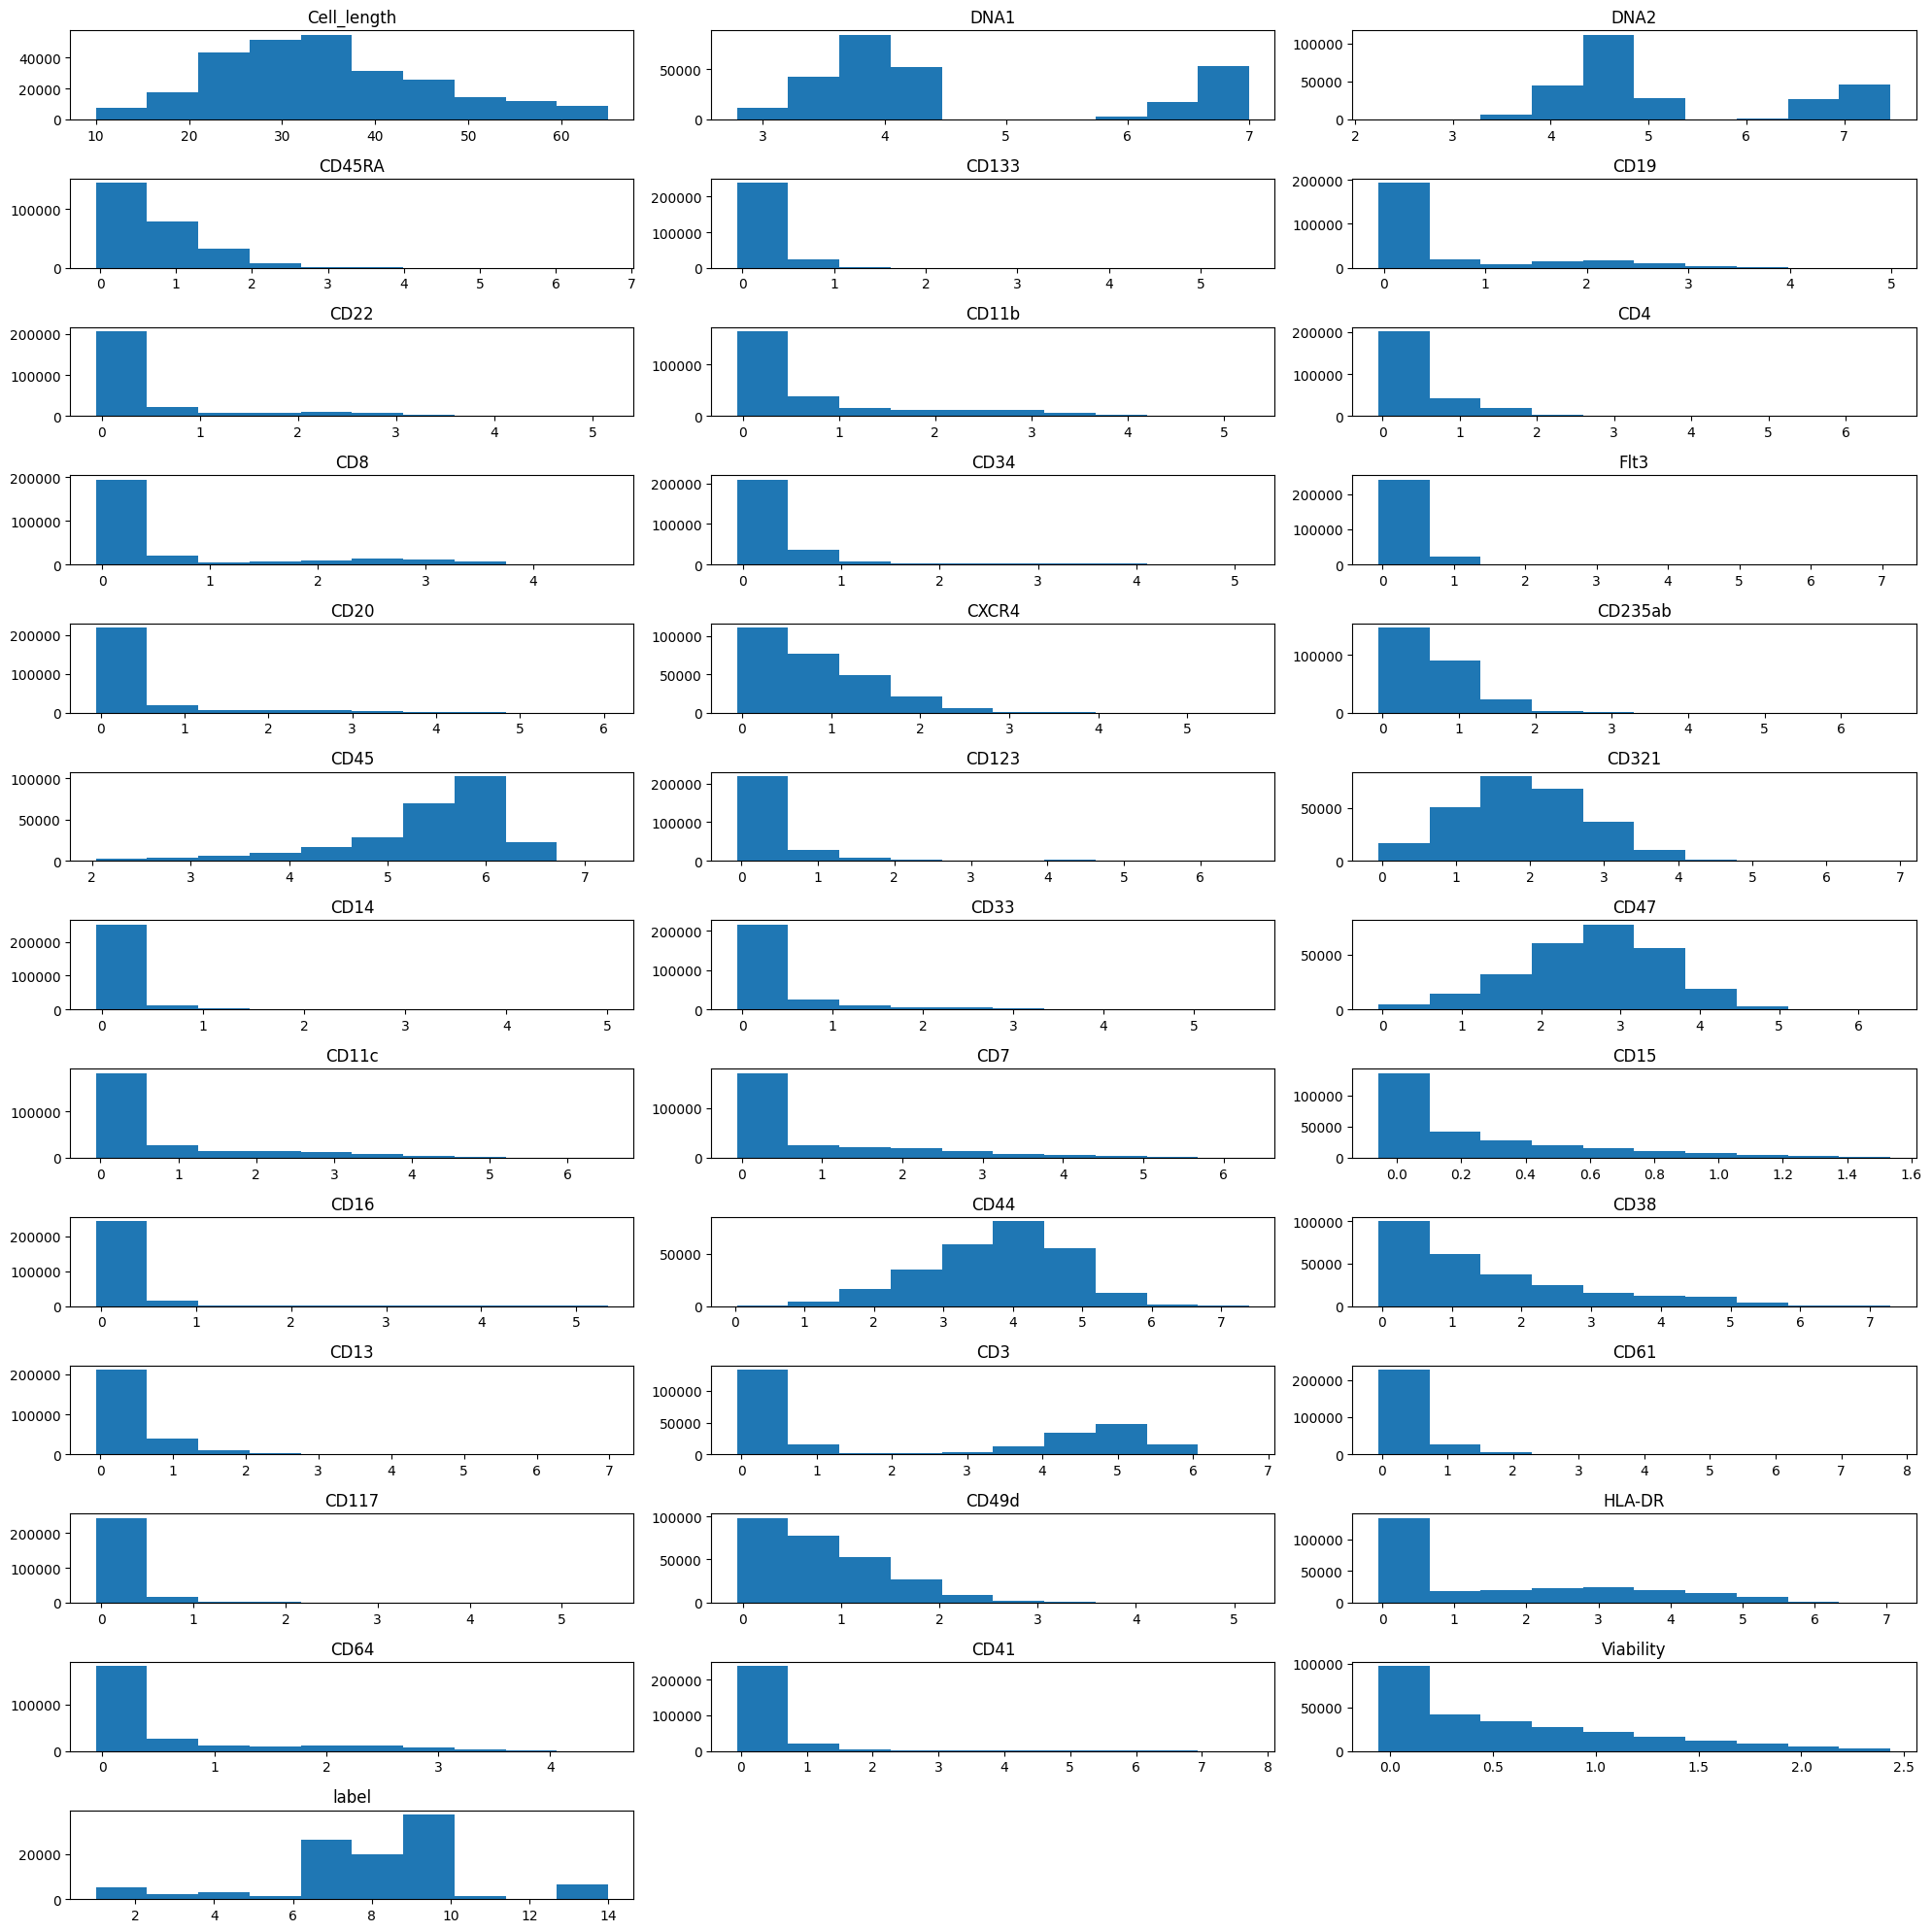

In [ ]:
import matplotlib.pyplot as plt
import math

# Define the number of columns in the grid
num_cols = 3

# Create a new figure
fig = plt.figure(figsize=(20, 20))

# Loop through each column in the data frame
for i, col in enumerate(df.columns):
    
    # Create a new subplot for this column
    ax = fig.add_subplot(math.ceil(len(df.columns) / num_cols), num_cols, i+1)
    
    # Plot the histogram
    ax.hist(df[col], bins=10)
    
    # Set the title
    ax.set_title(col)
    
# Adjust the spacing between the subplots
fig.tight_layout()

# Save the figure as a PNG
fig.savefig('histograms.png')

In [ ]:
df.describe()

,Cell_length,DNA1,DNA2,CD45RA,CD133,CD19,CD22,CD11b,CD4,CD8,...,CD13,CD3,CD61,CD117,CD49d,HLA-DR,CD64,CD41,Viability,label
count,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,...,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,265627.000000,104184.000000
mean,34.450572,4.606956,5.198308,0.688127,0.145960,0.509301,0.397323,0.710319,0.367597,0.565222,...,0.368558,2.165756,0.344455,0.131199,0.794938,1.521812,0.551512,0.261754,0.570037,8.116102
std,11.446694,1.312831,1.150357,0.609105,0.259267,0.857462,0.762126,1.011434,0.517376,1.003697,...,0.495551,2.268698,0.724138,0.313208,0.627619,1.694211,0.888739,0.617065,0.589738,2.457486
min,10.000000,2.786488,2.236450,-0.057305,-0.058081,-0.058089,-0.057342,-0.058236,-0.057751,-0.058003,...,-0.057728,-0.058241,-0.057642,-0.057668,-0.058064,-0.057974,-0.058199,-0.058244,-0.057979,1.000000
25%,26.000000,3.700023,4.407822,0.204625,-0.022935,-0.018838,-0.020689,-0.000294,-0.012590,-0.017322,...,0.021104,0.084946,-0.012853,-0.023957,0.283013,0.057709,-0.010582,-0.020166,0.065523,7.000000
50%,33.000000,4.022127,4.698415,0.549387,0.025353,0.075210,0.058790,0.257923,0.131218,0.073634,...,0.187058,0.603755,0.095691,-0.000410,0.677212,0.611335,0.122493,0.052229,0.398230,8.000000
75%,41.000000,6.353313,6.766268,1.031198,0.224299,0.548386,0.386481,0.923517,0.578119,0.486421,...,0.535504,4.665223,0.415791,0.154736,1.190787,2.888240,0.604131,0.305591,0.931058,10.000000
max,65.000000,7.001489,7.472308,6.691197,5.527494,4.990085,5.160477,5.260789,6.581762,4.693694,...,6.981187,6.748362,7.748498,5.502125,5.153438,7.052507,4.517843,7.718288,2.433031,14.000000
